<a href="https://colab.research.google.com/github/DustinHaschke/MoBS2024/blob/main/MoBS_Abgabe3_%2B_Projekt_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

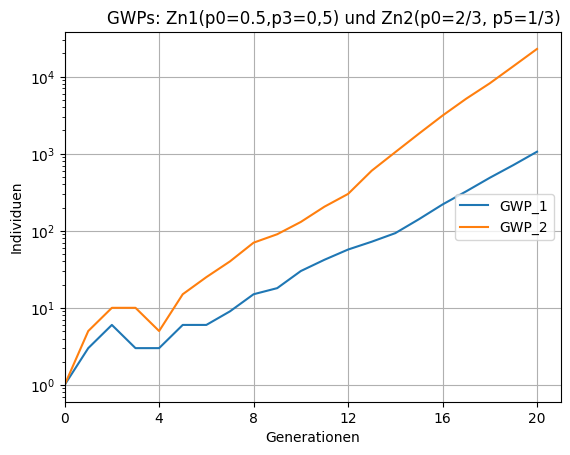

Ausgestorbene Individuen in Generation 20:   GWP_1: 2245  GWP_2: 34411


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Eingabewerte der GWPs
anzahl_generationen = 20
anzahl_startindividuen1 = 1
anzahl_startindividuen2 = 1
zn1_wk = [0.5]          # WK-Grenze
zn1_anz = [0, 3]        # #Nachkommen
zn2_wk = [2/3]          # WK-Grenze
zn2_anz = [0, 5]        # #Nachkommen

X = np.linspace(0, anzahl_generationen, num=anzahl_generationen+1, endpoint=True)
gwp1 = [anzahl_startindividuen1] + [0]*(anzahl_generationen)
gwp2 = [anzahl_startindividuen2] + [0]*(anzahl_generationen)
extinct1 = 0
extinct2 = 0

for generation in range(1, anzahl_generationen+1, 1):
    realisationen = np.random.rand(gwp1[generation-1])       #erstellt entsprechend viele zufällige Realisationen der Nachkommen
    extinct1 += gwp1[generation-1]
    for eintrag in realisationen:
        if eintrag < zn1_wk[0]:
            gwp1[generation] += zn1_anz[0]
        else:
            gwp1[generation] += zn1_anz[1]

for generation in range(1, anzahl_generationen+1, 1):
    realisationen = np.random.rand(gwp2[generation-1])       #erstellt entsprechend viele zufällige Realisationen der Nachkommen
    extinct2 += gwp2[generation-1]
    for eintrag in realisationen:
        if eintrag < zn2_wk[0]:
            gwp2[generation] += zn2_anz[0]
        else:
            gwp2[generation] += zn2_anz[1]

plt.plot(X,gwp1,label="GWP_1")
plt.plot(X,gwp2,label="GWP_2")
plt.xlabel("Generationen")
plt.ylabel("Individuen")
plt.title("GWPs: Zn1(p0=0.5,p3=0,5) und Zn2(p0=2/3, p5=1/3)",loc='right')
plt.legend(loc=5)
plt.xlim(0, anzahl_generationen + 1)
plt.yscale('log')
plt.xticks(np.arange(0, anzahl_generationen + 1, 4))
plt.grid()
plt.show()
print("Ausgestorbene Individuen in Generation ", anzahl_generationen, ":   GWP_1: ", extinct1,  "  GWP_2: ", extinct2, sep="")

# MOBS Projekt

Es haben 79 Pfade bis zur Generation 15 überlebt (Z_n).

Theoretischer Mittelwert von W
q ≈ 0.20                             (abgelesene Aussterbe-WK)
E(W) = 1 = q*0 + (1-q) * E(W|W>0)    (Satz 10.2)
<=> E[W∣W>0]= 1/1−q = 1.25.

geschätzter Mittelwert von W: 1.223202862317049


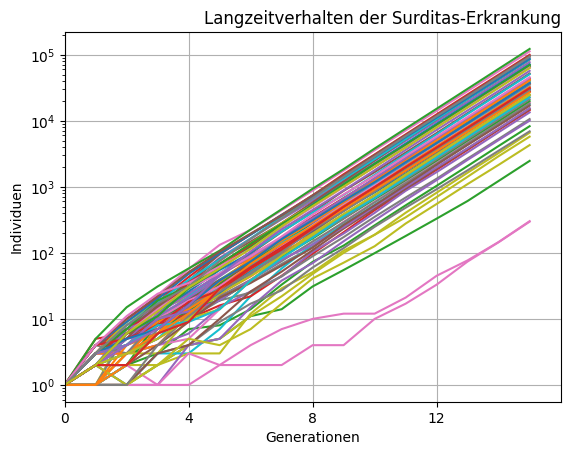

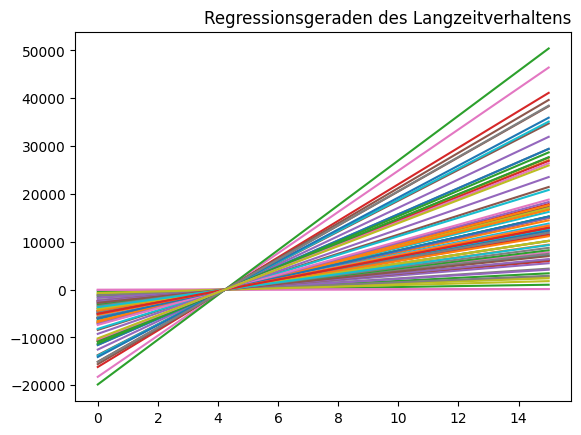

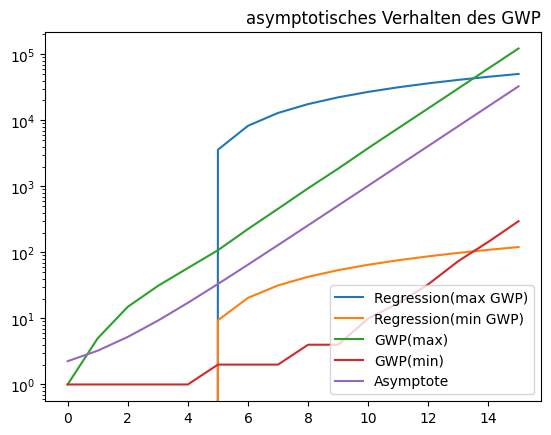

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Eingabewerte der GWPs und Prozesseigenschaften
simulierte_pfade = 100
anzahl_generationen = 15
z0 = 1
lamda = 2             # erwartete Nachkommenszahl männlicher Individuen
w_t = 1.25            # theoretischer EW für W

x = np.linspace(0, anzahl_generationen, num=anzahl_generationen+1, endpoint=True)           # x-Achse

# simulierte Pfade werden in z angelegt
z=[]
for i in range(simulierte_pfade):
    z.append([z0])

# Poisson-verteilte Nachkommen werden für die Pfade und einzelnen Generationen simuliert
for i in range(simulierte_pfade):
    for generation in range(1, anzahl_generationen+1, 1):
        if z[i][generation-1]==0:
            z[i].append(0)
        else:
            #Simulation der erkrankten Individuen pro Generation
            z[i].append(np.random.poisson(lam=lamda, size=(z[i][generation-1])).sum())

# Speichern der überlebenden Pfade
erfolgreiche_pfade = []
regressions_pfade = []
for i in range(simulierte_pfade):
    if z[i][anzahl_generationen] != 0:
        erfolgreiche_pfade.append(z[i])

        # Regressionsgerade zu erfolgreichem Pfad bilden
        steigung, achsenabschnitt = np.polyfit(x, np.array(z[i]), 1)
        regressions_pfade.append(steigung * x + achsenabschnitt)

print("Es haben",len(erfolgreiche_pfade),"Pfade bis zur Generation", anzahl_generationen, "überlebt (Z_n).")


# theoretisches W und Berechnung des Mittelwertes von W
print("""
Theoretischer Mittelwert von W
q ≈ 0.20                             (abgelesene Aussterbe-WK)
E(W) = 1 = q*0 + (1-q) * E(W|W>0)    (Satz 10.2)
<=> E[W∣W>0]= 1/1−q = 1.25.
""")

mittelwert_w = 0
for i in range(len(erfolgreiche_pfade)):
    # w_n = z_n / m^n (Doobscher Konvergenzsatz zur Schätzung von w)
    mittelwert_w += erfolgreiche_pfade[i][-1] / (lamda ** anzahl_generationen)

mittelwert_w = mittelwert_w / len(erfolgreiche_pfade)
print("geschätzter Mittelwert von W:", mittelwert_w)

# Plotten der überlebenden Pfade
for i in range(len(erfolgreiche_pfade)):
    plt.plot(x,erfolgreiche_pfade[i])

# Plot-Eigenschaften
plt.xlabel("Generationen")
plt.ylabel("Individuen")
plt.title("Langzeitverhalten der Surditas-Erkrankung",loc='right')
plt.xlim(0, anzahl_generationen + 1)
plt.yscale('log')
plt.xticks(np.arange(0, anzahl_generationen + 1, 4))
plt.grid()
plt.show()

# Plotten der Regressionsgeraden
plt.title("Regressionsgeraden des Langzeitverhaltens",loc='right')
plt.yscale('linear')
for i in range(len(regressions_pfade)):
    plt.plot(x,regressions_pfade[i])
plt.show()

# ermittle den größten und kleinsten überlebenden GWP
ueberlebende_indiv = 0
index_groesster = -1
for i in range(len(erfolgreiche_pfade)):
    if erfolgreiche_pfade[i][-1] > ueberlebende_indiv:
        ueberlebende_indiv = erfolgreiche_pfade[i][-1]
        index_groesster = i
ueberlebende_indiv = 0
index_kleinster = -1
for i in range(len(erfolgreiche_pfade)):
    if (erfolgreiche_pfade[i][-1] < ueberlebende_indiv) or ueberlebende_indiv == 0:
        ueberlebende_indiv = erfolgreiche_pfade[i][-1]
        index_kleinster = i

# Plotten des asymptotischen Verhaltens des kleinsten & größten GWPs + Regression + Asymptote
plt.title("asymptotisches Verhalten des GWP",loc='right')
plt.yscale('log')
plt.plot(x,regressions_pfade[index_groesster], label = "Regression(max GWP)")
plt.plot(x,regressions_pfade[index_kleinster], label = "Regression(min GWP)")
plt.plot(x,erfolgreiche_pfade[index_groesster], label = "GWP(max)")
plt.plot(x,erfolgreiche_pfade[index_kleinster], label = "GWP(min)")

#Berechnung der Asymptote von w_t   über log(w_t) + n*log(m)   mit m=lamda, n=anzahl_generartionen, w_t=w_t
y_asymp = w_t + lamda**x
plt.plot(x,y_asymp, label = "Asymptote")

plt.legend(loc=4)
plt.show()

In [11]:
import numpy as np

lam = 1
n_samples = 0

random_samples = np.random.poisson(lam=lam, size=n_samples)
print("Poisson-stichproben (Numpy):", random_samples.sum())


Poisson-stichproben (Numpy): 0


In [12]:
np.random.poisson(lam=1, size=0)

array([], dtype=int64)

In [50]:
print(y_asymp)

[ 0.22314355  0.91629073  1.60943791  2.30258509  2.99573227  3.68887945
  4.38202663  5.07517382  5.768321    6.46146818  7.15461536  7.84776254
  8.54090972  9.2340569   9.92720408 10.62035126]


In [37]:
z = [[1,2,5,4],[1,3,4,5,1],[1],[1]]
#z = [[1][1][1]*100]

y = [anzahl_startindividuen1] + [0]*(anzahl_generationen)

print(z)

print(z[1][2])

print(list([1]*100))


liste = []
for i in range(100):
    liste.append([1])

print(liste)

[[1, 2, 5, 4], [1, 3, 4, 5, 1], [1], [1]]
4
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]


In [5]:
z = [[2,4,5],[0,3,2],[2,2]]

del z[1][2]

print(z)

print(len(z))

[[2, 4, 5], [0, 3], [2, 2]]
3


In [5]:
import numpy as np

x = np.array([1,2,3])
y = np.array([2,5,4])

steigung, achsenabschnitt = np.polyfit(x, y, 1)
y_reg = steigung * x + achsenabschnitt

print(y_reg)

[2.66666667 3.66666667 4.66666667]


Gefundene Parameter:
a = 2.0033
b = 1.9945


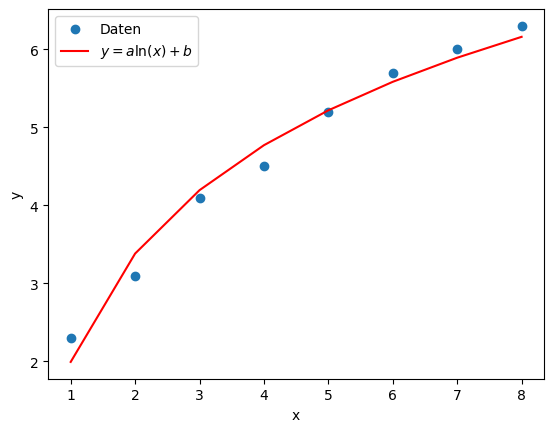

In [68]:
#GPT Zeugs

import numpy as np
import matplotlib.pyplot as plt

# Beispiel-Daten (x > 0)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype=float)
y = np.array([2.3, 3.1, 4.1, 4.5, 5.2, 5.7, 6.0, 6.3], dtype=float)

# Logarithmus der x-Werte
X = np.log(x)

# Lineare Regression durch polyfit (Grad=1)
params = np.polyfit(X, y, 1)
a, b = params  # a = Steigung, b = Achsenabschnitt

print("Gefundene Parameter:")
print(f"a = {a:.4f}")
print(f"b = {b:.4f}")

# Vorhersage mit dem angepassten Modell y = a ln(x) + b
y_fit = a * np.log(x) + b

# Plot
plt.scatter(x, y, label="Daten")
plt.plot(x, y_fit, color="red", label=r"$y = a \ln(x) + b$")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
